## Data Science Hons Lab Assignment 3:
### Build training and testing dataset of assignment 2 to predict the probability of a survival of a person based on gender, age and passenger-class. Use Naive Bayes classification algorithm to predict the class of passenger.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('train-data.csv')
test_data=pd.read_csv('test-data.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   Fare        712 non-null    float64
 3   Pclass_1    712 non-null    int64  
 4   Pclass_2    712 non-null    int64  
 5   Pclass_3    712 non-null    int64  
 6   Sex_female  712 non-null    int64  
 7   Sex_male    712 non-null    int64  
 8   SibSp_0     712 non-null    int64  
 9   SibSp_1     712 non-null    int64  
 10  SibSp_2     712 non-null    int64  
 11  SibSp_3     712 non-null    int64  
 12  SibSp_4     712 non-null    int64  
 13  SibSp_5     712 non-null    int64  
 14  SibSp_8     712 non-null    int64  
 15  Parch_0     712 non-null    int64  
 16  Parch_1     712 non-null    int64  
 17  Parch_2     712 non-null    int64  
 18  Parch_3     712 non-null    int64  
 19  Parch_4     712 non-null    i

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    179 non-null    int64  
 1   Age         179 non-null    float64
 2   Fare        179 non-null    float64
 3   Pclass_1    179 non-null    int64  
 4   Pclass_2    179 non-null    int64  
 5   Pclass_3    179 non-null    int64  
 6   Sex_female  179 non-null    int64  
 7   Sex_male    179 non-null    int64  
 8   SibSp_0     179 non-null    int64  
 9   SibSp_1     179 non-null    int64  
 10  SibSp_2     179 non-null    int64  
 11  SibSp_3     179 non-null    int64  
 12  SibSp_4     179 non-null    int64  
 13  SibSp_5     179 non-null    int64  
 14  SibSp_8     179 non-null    int64  
 15  Parch_0     179 non-null    int64  
 16  Parch_1     179 non-null    int64  
 17  Parch_2     179 non-null    int64  
 18  Parch_3     179 non-null    int64  
 19  Parch_4     179 non-null    i

In [5]:
train_data.shape

(712, 25)

In [6]:
test_data.shape

(179, 25)

In [7]:
train_data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,28.500000,7.2292,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,27.000000,10.5000,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,29.699118,16.1000,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,29.699118,0.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,17.000000,8.6625,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [8]:
test_data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,35.0,7.1250,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,20.0,7.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,26.0,7.8958,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,58.0,146.5208,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,83.4750,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [9]:
train_data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
test_data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
train_data.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.00000,712.00000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.393258,29.674341,32.777006,0.238764,0.209270,0.551966,0.36236,0.63764,0.688202,0.230337,...,0.751404,0.140449,0.087079,0.007022,0.005618,0.007022,0.001404,0.179775,0.082865,0.737360
std,0.488817,12.986095,51.481840,0.426628,0.407073,0.497642,0.48102,0.48102,0.463553,0.421345,...,0.432503,0.347697,0.282148,0.083564,0.074795,0.083564,0.037477,0.384270,0.275872,0.440378
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.925000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.456250,0.000000,0.000000,1.000000,0.00000,1.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.275000,0.000000,0.000000,1.000000,1.00000,1.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
test_data.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.0,179.0,179.0,179.0,179.000000,179.000000,179.000000
mean,0.346369,29.797670,29.925814,0.256983,0.195531,0.547486,0.312849,0.687151,0.659218,0.251397,...,0.798883,0.100559,0.100559,0.0,0.0,0.0,0.0,0.223464,0.100559,0.675978
std,0.477147,13.101242,41.881046,0.438196,0.397721,0.499136,0.464954,0.464954,0.475302,0.435033,...,0.401960,0.301587,0.301587,0.0,0.0,0.0,0.0,0.417735,0.301587,0.469321
min,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,22.500000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
75%,1.000000,35.000000,30.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
max,1.000000,74.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


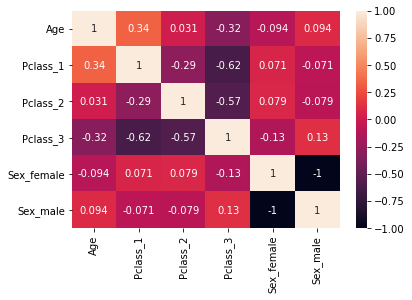

In [13]:
sns.heatmap(train_data[['Age','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male']].corr(),annot=True)

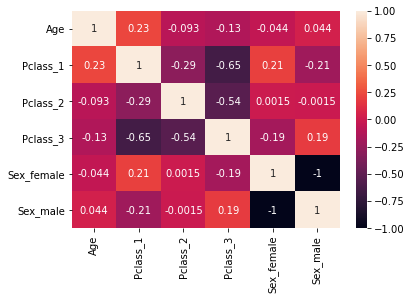

In [14]:
sns.heatmap(test_data[['Age','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male']].corr(),annot=True)

In [15]:
# target variable - Survived
# separate the independent and target variable on training data
train_x = train_data[['Age','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male']]
train_y = train_data['Survived']

In [16]:
# separate the independent and target variable on testing data
test_x = test_data[['Age','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male']]
test_y = test_data['Survived']

In [17]:
train_x.shape

(712, 6)

In [18]:
train_y.shape

(712,)

In [19]:
test_x.shape

(179, 6)

In [20]:
test_y.shape

(179,)

In [21]:
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score

In [22]:
model = GaussianNB()
model.fit(train_x,train_y)

GaussianNB()

In [23]:
# probabilistic prediction
predicted_test_prob = model.predict(test_x)
predicted_train_prob = model.predict(train_x)

In [24]:
test_accuracy = model.score(test_x,test_y)
print('accuracy_score on train dataset : ', model.score(train_x,train_y))
print('accuracy_score on test dataset : ', test_accuracy)

accuracy_score on train dataset :  0.7752808988764045
accuracy_score on test dataset :  0.8268156424581006


In [25]:
mod = MultinomialNB()
mod.fit(train_x,train_y)

MultinomialNB()

In [26]:
# probabilistic prediction
predicted_test_prob = mod.predict(test_x)
predicted_train_prob = mod.predict(train_x)

In [27]:
test_accuracy = mod.score(test_x,test_y)
print('accuracy_score on train dataset : ', mod.score(train_x,train_y))
print('accuracy_score on test dataset : ', test_accuracy)

accuracy_score on train dataset :  0.7780898876404494
accuracy_score on test dataset :  0.8212290502793296


In [28]:
modl = BernoulliNB()
modl.fit(train_x,train_y)

BernoulliNB()

In [29]:
# probabilistic prediction
predicted_test_prob = modl.predict(test_x)
predicted_train_prob = modl.predict(train_x)

In [30]:
test_accuracy = modl.score(test_x,test_y)
print('accuracy_score on train dataset : ', modl.score(train_x,train_y))
print('accuracy_score on test dataset : ', test_accuracy)

accuracy_score on train dataset :  0.7780898876404494
accuracy_score on test dataset :  0.8212290502793296


In [31]:
print("Model Accuracy on train data",accuracy_score(train_y,predicted_train_prob))

Model Accuracy on train data 0.7780898876404494


In [32]:
print("Model Accuracy on test data",accuracy_score(test_y,predicted_test_prob))

Model Accuracy on test data 0.8212290502793296
